In [3]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [4]:
folder_path = "D:/Projects/News Article classifier/01 Dataset Creation/Pickles//"

filename = "features_test.pickle"
with open(folder_path + filename, "rb") as file:
    features_test = pickle.load(file)
    
filename = "features_train.pickle"
with open(folder_path + filename, "rb") as file:
    features_train = pickle.load(file)
    
filename = "labels_test.pickle"
with open(folder_path + filename, "rb") as file:
    labels_test = pickle.load(file)

filename = "labels_train.pickle"
with open(folder_path + filename, "rb") as file:
    labels_train = pickle.load(file)
    
filename = "data.pickle"
with open(folder_path + filename, "rb") as file:
    data = pickle.load(file)

In [5]:
mnb = MultinomialNB()
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
mnb.fit(features_train, labels_train)
ypred = mnb.predict(features_test)

## Model Performance

### Training Accuracy

In [7]:
print("Training Accuracy : ", (accuracy_score(mnb.predict(features_train), labels_train)))

Training Accuracy :  0.9562612342720191


### Test Accuracy

In [8]:
ypred = mnb.predict(features_test)
print("Test Accuracy : ", (accuracy_score(ypred, labels_test)))

Test Accuracy :  0.9389587073608617


### Classification Report

In [9]:
print(classification_report(ypred, labels_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       117
           1       0.94      0.91      0.93       111
           2       0.95      0.95      0.95        99
           3       0.97      0.95      0.96       141
           4       0.87      0.94      0.90        89

    accuracy                           0.94       557
   macro avg       0.94      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557



### Confusion Matrix

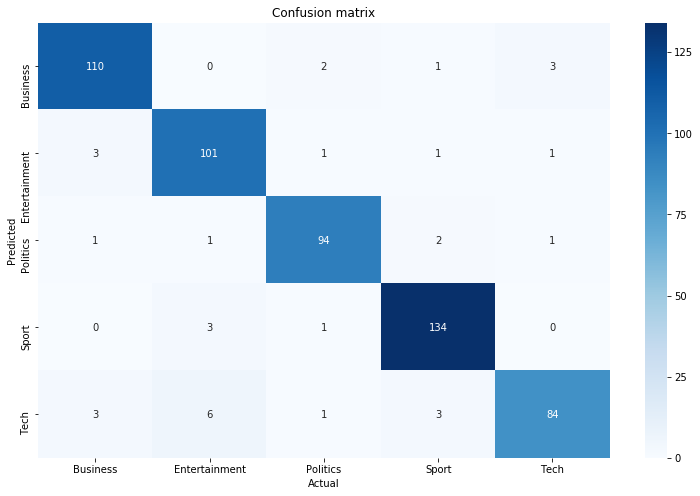

In [11]:
aux_df = data[['Category', 'Category_codes']].drop_duplicates().sort_values('Category_codes')
conf_matrix = confusion_matrix(labels_test, ypred)

plt.figure(figsize=(12.8,8))
ax = sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues", fmt = 'g')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


We will create a dataframe with Model Name, Training Accuracy and Test Accuracy to compare later

In [14]:
models_summary = pd.DataFrame({"Model Name:" : ["MultinomialNB"],
     "Training Accuracy" : [accuracy_score(labels_train, mnb.predict(features_train))],
     "Test Accuracy" : [accuracy_score(labels_test, ypred)]}, index = [4])

In [15]:
models_summary

,Model Name:,Training Accuracy,Test Accuracy
4,MultinomialNB,0.956261,0.938959


In [16]:
with open("Models//models_summary.pickle", "rb") as file:
    all_models_summary = pickle.load(file)
all_models_summary = all_models_summary.append(models_summary)
all_models_summary

,Model Name:,Training Accuracy,Test Accuracy
0,Random Forest Classifier,1.000000,0.960503
1,Gradient Boosting Classifier,1.000000,0.958707
2,Support Vector Machine,1.000000,0.944345
3,KNN,0.928700,0.910233
4,MultinomialNB,0.956261,0.938959


In [17]:
with open("Models//best_mnb.pickle", "wb") as output:
    pickle.dump(mnb, output)
    
with open("Models//models_summary.pickle", "wb") as output:
    pickle.dump(all_models_summary, output)